In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

In [ ]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

In [ ]:
!pip3 install -q findspark

In [ ]:
!tar zxvf /content/spark-3.0.3-bin-hadoop2.7.tgz

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop2.7/jars/
spark-3.0.3-bin-hadoop2.7/jars/jacks

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.0.3-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
# Read dadsets from perdonal Google Drive
from google.colab import drive
drive.mount('/content/drive')
covid_cc_path = "/content/drive/MyDrive/Colab Notebooks/covid_cases.csv"
mobility_data_path = "/content/drive/MyDrive/Colab Notebooks/data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the data directly into the spark cluster

In [ ]:
covid_cc_data = spark.read.csv(covid_cc_path, header=True, inferSchema=True)
covid_cc_data.printSchema()

root
 |-- iso_code: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: string (nullable = true)
 |-- total_cases: double (nullable = true)
 |-- new_cases: double (nullable = true)
 |-- new_cases_smoothed: double (nullable = true)
 |-- total_deaths: double (nullable = true)
 |-- new_deaths: double (nullable = true)
 |-- new_deaths_smoothed: double (nullable = true)
 |-- total_cases_per_million: double (nullable = true)
 |-- new_cases_per_million: double (nullable = true)
 |-- new_cases_smoothed_per_million: double (nullable = true)
 |-- total_deaths_per_million: double (nullable = true)
 |-- new_deaths_per_million: double (nullable = true)
 |-- new_deaths_smoothed_per_million: double (nullable = true)
 |-- reproduction_rate: double (nullable = true)
 |-- icu_patients: double (nullable = true)
 |-- icu_patients_per_million: double (nullable = true)
 |-- hosp_patients: double (nullable = true)
 |-- hosp_patients_per_million

In [ ]:
covid_cc_data.show(5)

+--------+---------+-----------+----------+-----------+---------+------------------+------------+----------+-------------------+-----------------------+---------------------+------------------------------+------------------------+----------------------+-------------------------------+-----------------+------------+------------------------+-------------+-------------------------+---------------------+---------------------------------+----------------------+----------------------------------+-----------+---------+------------------------+----------------------+------------------+-------------------------------+-------------+--------------+-----------+------------------+-----------------+-----------------------+----------------+-------------------------+------------------------------+-----------------------------+-----------------------------------+-------------------------------------+----------------+-----------+------------------+----------+-------------+-------------+--------------+--

In [ ]:
covid_mobility_data = spark.read.csv(mobility_data_path, header=True, inferSchema=True)
covid_mobility_data.printSchema()

root
 |-- country_region_code: string (nullable = true)
 |-- country_region: string (nullable = true)
 |-- sub_region_1: string (nullable = true)
 |-- sub_region_2: string (nullable = true)
 |-- metro_area: string (nullable = true)
 |-- iso_3166_2_code: string (nullable = true)
 |-- census_fips_code: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- retail_and_recreation_percent_change_from_baseline: integer (nullable = true)
 |-- grocery_and_pharmacy_percent_change_from_baseline: integer (nullable = true)
 |-- parks_percent_change_from_baseline: integer (nullable = true)
 |-- transit_stations_percent_change_from_baseline: integer (nullable = true)
 |-- workplaces_percent_change_from_baseline: integer (nullable = true)
 |-- residential_percent_change_from_baseline: integer (nullable = true)



In [ ]:
covid_mobility_data.show(5)

+-------------------+--------------------+------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+-------------------------------------------------+----------------------------------+---------------------------------------------+---------------------------------------+----------------------------------------+
|country_region_code|      country_region|sub_region_1|sub_region_2|metro_area|iso_3166_2_code|census_fips_code|      date|retail_and_recreation_percent_change_from_baseline|grocery_and_pharmacy_percent_change_from_baseline|parks_percent_change_from_baseline|transit_stations_percent_change_from_baseline|workplaces_percent_change_from_baseline|residential_percent_change_from_baseline|
+-------------------+--------------------+------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+-------------------------------------------------+--

In [ ]:
# list of countries in covid_cc_data
all_countries_covid_cc_data = covid_cc_data.select("location").distinct().collect()
list(map(lambda x:x['location'],all_countries_covid_cc_data))


['Chad',
 'Paraguay',
 'Russia',
 'International',
 'World',
 'Yemen',
 'Senegal',
 'Sweden',
 'Guyana',
 'Eritrea',
 'Philippines',
 'Djibouti',
 'Malaysia',
 'Singapore',
 'Fiji',
 'Turkey',
 'Malawi',
 'Iraq',
 'Germany',
 'Comoros',
 'Afghanistan',
 'Cambodia',
 'Jordan',
 'Maldives',
 'Rwanda',
 'Sudan',
 'France',
 'Greece',
 'Kosovo',
 'Sri Lanka',
 'Dominica',
 'Taiwan',
 'Algeria',
 'Equatorial Guinea',
 'Togo',
 'Slovakia',
 'Argentina',
 'Angola',
 'Belgium',
 'Vatican',
 'San Marino',
 'Ecuador',
 'Qatar',
 'Lesotho',
 'Albania',
 'Madagascar',
 'Finland',
 'Ghana',
 'Myanmar',
 'Nicaragua',
 'Benin',
 'Peru',
 'Sierra Leone',
 'Bahamas',
 'China',
 'India',
 'United States',
 'Belarus',
 'Kuwait',
 'Malta',
 'Sao Tome and Principe',
 'Marshall Islands',
 'Somalia',
 'Chile',
 'Tajikistan',
 'Croatia',
 'Burundi',
 'Andorra',
 'Bolivia',
 'Nigeria',
 'Gabon',
 'Italy',
 'Suriname',
 'Lithuania',
 'Norway',
 'Spain',
 'Cuba',
 'Mauritania',
 'Czechia',
 'Central African Repu

In [ ]:
# list of countries in covid_mobility_data
all_countries_mobility_data = covid_mobility_data.select("country_region").distinct().collect()
list(map(lambda x:x['country_region'],all_countries_mobility_data))

["Côte d'Ivoire",
 'Paraguay',
 'Russia',
 'Yemen',
 'Senegal',
 'Sweden',
 'Philippines',
 'Malaysia',
 'Singapore',
 'Fiji',
 'Turkey',
 'Iraq',
 'Germany',
 'Afghanistan',
 'Cambodia',
 'Jordan',
 'Rwanda',
 'France',
 'Greece',
 'Sri Lanka',
 'Taiwan',
 'Togo',
 'Slovakia',
 'Argentina',
 'Angola',
 'Belgium',
 'Ecuador',
 'Qatar',
 'Finland',
 'Ghana',
 'Nicaragua',
 'Benin',
 'Peru',
 'India',
 'United States',
 'Belarus',
 'Kuwait',
 'Malta',
 'Chile',
 'Puerto Rico',
 'Tajikistan',
 'Croatia',
 'Bolivia',
 'Nigeria',
 'Gabon',
 'Italy',
 'Réunion',
 'Lithuania',
 'Norway',
 'Spain',
 'Czechia',
 'Denmark',
 'Niger',
 'Barbados',
 'Bangladesh',
 'Ireland',
 'Liechtenstein',
 'Laos',
 'Thailand',
 'Morocco',
 'Cape Verde',
 'Panama',
 'Hong Kong',
 'Ukraine',
 'Venezuela',
 'Israel',
 'Oman',
 'South Korea',
 'Uruguay',
 'Mexico',
 'Aruba',
 'Estonia',
 'Georgia',
 'Zimbabwe',
 'Indonesia',
 'The Bahamas',
 'Guatemala',
 'Mongolia',
 'Libya',
 'Honduras',
 'Trinidad and Tobago',


## Selecting Australia and UK.

In [ ]:
# convert all the date format to a timestamp
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import col
dateFormat = "yyyy-MM-dd"
covid_cc_data = covid_cc_data.withColumn("date", to_timestamp(col("date"), dateFormat))
covid_cc_data

DataFrame[iso_code: string, continent: string, location: string, date: timestamp, total_cases: double, new_cases: double, new_cases_smoothed: double, total_deaths: double, new_deaths: double, new_deaths_smoothed: double, total_cases_per_million: double, new_cases_per_million: double, new_cases_smoothed_per_million: double, total_deaths_per_million: double, new_deaths_per_million: double, new_deaths_smoothed_per_million: double, reproduction_rate: double, icu_patients: double, icu_patients_per_million: double, hosp_patients: double, hosp_patients_per_million: double, weekly_icu_admissions: double, weekly_icu_admissions_per_million: double, weekly_hosp_admissions: double, weekly_hosp_admissions_per_million: double, total_tests: double, new_tests: double, total_tests_per_thousand: double, new_tests_per_thousand: double, new_tests_smoothed: double, new_tests_smoothed_per_thousand: double, positive_rate: double, tests_per_case: double, tests_units: string, total_vaccinations: double, people

In [ ]:
# convert all the date format to a timestamp
dateFormat = "yyyy-MM-dd"
covid_mobility_data = covid_mobility_data.withColumn("date", to_timestamp(col("date"), dateFormat))
covid_mobility_data.show(5)

+-------------------+--------------------+------------+------------+----------+---------------+----------------+-------------------+--------------------------------------------------+-------------------------------------------------+----------------------------------+---------------------------------------------+---------------------------------------+----------------------------------------+
|country_region_code|      country_region|sub_region_1|sub_region_2|metro_area|iso_3166_2_code|census_fips_code|               date|retail_and_recreation_percent_change_from_baseline|grocery_and_pharmacy_percent_change_from_baseline|parks_percent_change_from_baseline|transit_stations_percent_change_from_baseline|workplaces_percent_change_from_baseline|residential_percent_change_from_baseline|
+-------------------+--------------------+------------+------------+----------+---------------+----------------+-------------------+--------------------------------------------------+-------------------------

In [ ]:
# filter each ”change_from_baseline” column, drop null values
# group rows together based on the date, aggregate the average of the rows with the same date then sort each column by date.
# alias name can be chosen to shorten the column name.

import pyspark.sql.functions as F
from pyspark.sql.functions import *
from pyspark.sql.types import *
australia_covid_mobility_data = covid_mobility_data.select("*").where("country_region == 'Australia'")
AUS_retail_recreasion_grp_mobility = australia_covid_mobility_data.filter(australia_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("retail_and_recreation_percent_change_from_baseline").alias("AUS_retail_recreasion")).sort("date")
AUS_grocery_and_pharmacy_grp_mobility = australia_covid_mobility_data.filter(australia_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("grocery_and_pharmacy_percent_change_from_baseline").alias("AUS_grocery_and_pharmacy")).sort("date")
AUS_park_grp_mobility = australia_covid_mobility_data.filter(australia_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("parks_percent_change_from_baseline").alias("AUS_park")).sort("date")
AUS_transit_stations_grp_mobility = australia_covid_mobility_data.filter(australia_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("transit_stations_percent_change_from_baseline").alias("AUS_transit_stations")).sort("date")
AUS_workplaces_grp_mobility = australia_covid_mobility_data.filter(australia_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("workplaces_percent_change_from_baseline").alias("AUS_workplaces")).sort("date")
AUS_residential_grp_mobility = australia_covid_mobility_data.filter(australia_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("residential_percent_change_from_baseline").alias("AUS_residential")).sort("date")
AUS_residential_grp_mobility.show(5)

+-------------------+---------------+
|               date|AUS_residential|
+-------------------+---------------+
|2020-02-15 00:00:00|            0.0|
|2020-02-16 00:00:00|            0.0|
|2020-02-17 00:00:00|           -2.0|
|2020-02-18 00:00:00|           -1.0|
|2020-02-19 00:00:00|           -1.0|
+-------------------+---------------+
only showing top 5 rows



In [ ]:
au_covid_cc_data = covid_cc_data.select("*").where("location == 'Australia'").sort("date")
uk_covid_cc_data = covid_cc_data.select("*").where("location == 'United Kingdom'").sort("date")

au_covid_cc_data_pd = au_covid_cc_data.toPandas()
uk_covid_cc_data_pd = uk_covid_cc_data.toPandas()

In [ ]:
# filter each ”change_from_baseline” column, drop null values
# group rows together based on the date, aggregate the average of the rows with the same date then sort each column by date.
# alias name can be chosen to shorten the column name.
uk_covid_mobility_data = covid_mobility_data.select("*").where("country_region == 'Australia'")
UK_retail_recreasion_grp_mobility = uk_covid_mobility_data.filter(uk_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("retail_and_recreation_percent_change_from_baseline").alias("UK_retail_recreasion")).sort("date")
UK_grocery_and_pharmacy_grp_mobility = uk_covid_mobility_data.filter(uk_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("grocery_and_pharmacy_percent_change_from_baseline").alias("UK_grocery_and_pharmacy")).sort("date")
UK_park_grp_mobility = uk_covid_mobility_data.filter(uk_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("parks_percent_change_from_baseline").alias("UK_park")).sort("date")
UK_transit_stations_grp_mobility = uk_covid_mobility_data.filter(uk_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("transit_stations_percent_change_from_baseline").alias("UK_transit_stations")).sort("date")
UK_workplaces_grp_mobility = uk_covid_mobility_data.filter(uk_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("workplaces_percent_change_from_baseline").alias("UK_workplaces")).sort("date")
UK_residential_grp_mobility = uk_covid_mobility_data.filter(uk_covid_mobility_data.sub_region_1.isNull()).groupBy("date").agg(avg("residential_percent_change_from_baseline").alias("UK_residential")).sort("date")
UK_retail_recreasion_grp_mobility.show(5)

+-------------------+--------------------+
|               date|UK_retail_recreasion|
+-------------------+--------------------+
|2020-02-15 00:00:00|                 4.0|
|2020-02-16 00:00:00|                 3.0|
|2020-02-17 00:00:00|                -1.0|
|2020-02-18 00:00:00|                -3.0|
|2020-02-19 00:00:00|                -1.0|
+-------------------+--------------------+
only showing top 5 rows



In [ ]:
# convert the Spark DataFrame into a Pandas DataFrame
AUS_retail_recreasion_grp_mobility_pd = AUS_retail_recreasion_grp_mobility.toPandas()
UK_retail_recreasion_grp_mobility_pd = UK_retail_recreasion_grp_mobility.toPandas()
AUS_grocery_and_pharmacy_grp_mobility_pd = AUS_grocery_and_pharmacy_grp_mobility.toPandas()
UK_grocery_and_pharmacy_grp_mobility_pd = UK_grocery_and_pharmacy_grp_mobility.toPandas()
AUS_park_grp_mobility_pd = AUS_park_grp_mobility.toPandas()
UK_park_grp_mobility_pd = UK_park_grp_mobility.toPandas()
AUS_transit_stations_grp_mobility_pd = AUS_transit_stations_grp_mobility.toPandas()
UK_transit_stations_grp_mobility_pd = UK_transit_stations_grp_mobility.toPandas()
AUS_workplaces_grp_mobility_pd = AUS_workplaces_grp_mobility.toPandas()
UK_workplaces_grp_mobility_pd = UK_workplaces_grp_mobility.toPandas()
AUS_residential_grp_mobility_pd = AUS_residential_grp_mobility.toPandas()
UK_residential_grp_mobility_pd = UK_residential_grp_mobility.toPandas()

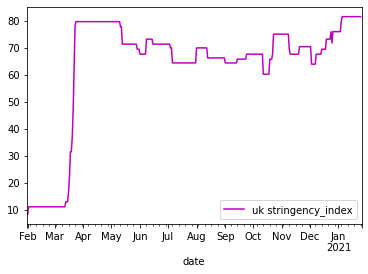

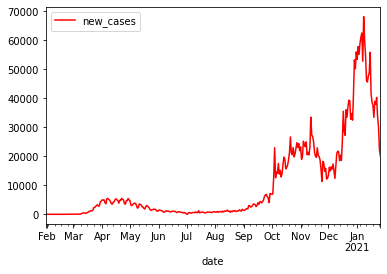

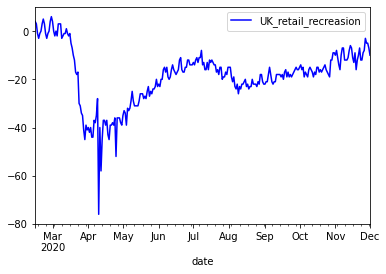

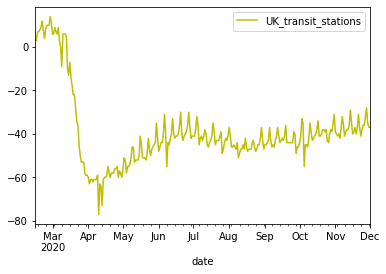

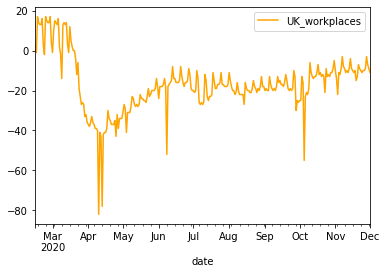

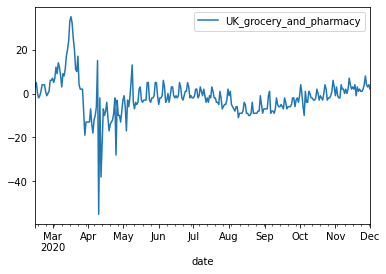

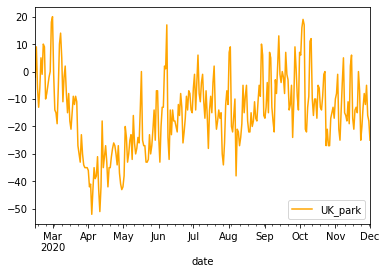

In [ ]:
# Plot stringency_index, new_cases and mobilities variables in UK  
uk_covid_cc_data_pd.plot("date", "stringency_index", label='uk stringency_index' , c = 'm')
uk_covid_cc_data_pd.plot("date", "new_cases", c = 'r')
UK_retail_recreasion_grp_mobility_pd.plot("date", "UK_retail_recreasion", c= 'blue')
UK_transit_stations_grp_mobility_pd.plot("date", "UK_transit_stations", c= 'y')
UK_workplaces_grp_mobility_pd.plot("date", "UK_workplaces", c= 'orange')
UK_grocery_and_pharmacy_grp_mobility_pd.plot("date", "UK_grocery_and_pharmacy")
UK_park_grp_mobility_pd.plot("date", "UK_park", c= 'orange')

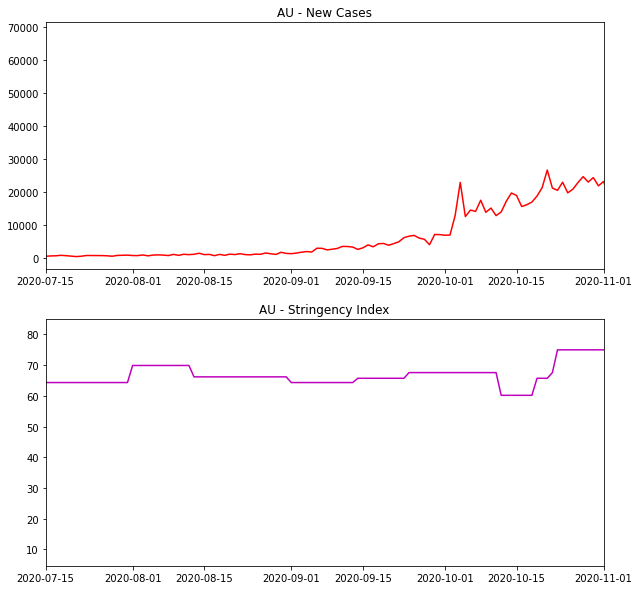

In [ ]:
# Closer look into second covid wave in UK
fig, axes = plt.subplots(2, 1,figsize=(10, 10))

axes[0].plot(uk_covid_cc_data_pd["date"], uk_covid_cc_data_pd["new_cases"], c ='r')
axes[0].set_title("AU - New Cases")
axes[0].set_xlim(pd.Timestamp('2020-07-15'), pd.Timestamp('2020-11-01'))

axes[1].plot(uk_covid_cc_data_pd["date"], uk_covid_cc_data_pd["stringency_index"], c = 'm')
axes[1].set_title("AU - Stringency Index")
axes[1].set_xlim(pd.Timestamp('2020-07-15'), pd.Timestamp('2020-11-01'))

plt.show()

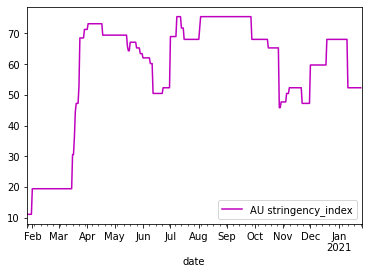

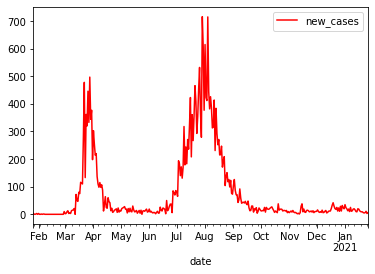

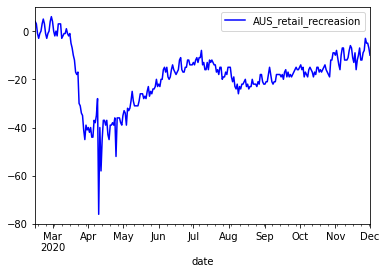

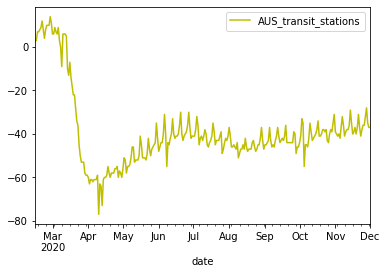

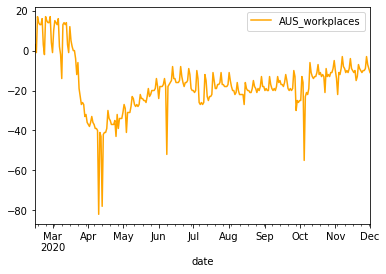

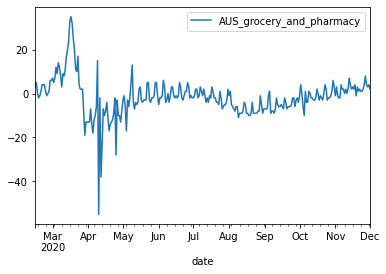

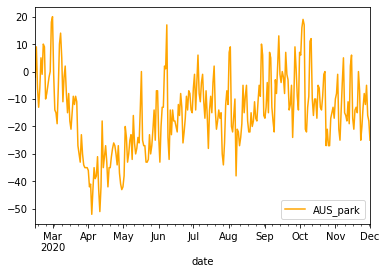

In [ ]:
# Plot stringency_index, new_cases and mobilities variables in Australia  
au_covid_cc_data_pd.plot("date", "stringency_index", label='AU stringency_index' , c = 'm')
au_covid_cc_data_pd.plot("date", "new_cases", c = 'r')
AUS_retail_recreasion_grp_mobility_pd.plot("date", "AUS_retail_recreasion", c= 'blue')
AUS_transit_stations_grp_mobility_pd.plot("date", "AUS_transit_stations", c= 'y')
AUS_workplaces_grp_mobility_pd.plot("date", "AUS_workplaces", c= 'orange')
AUS_grocery_and_pharmacy_grp_mobility_pd.plot("date", "AUS_grocery_and_pharmacy")
AUS_park_grp_mobility_pd.plot("date", "AUS_park", c= 'orange')

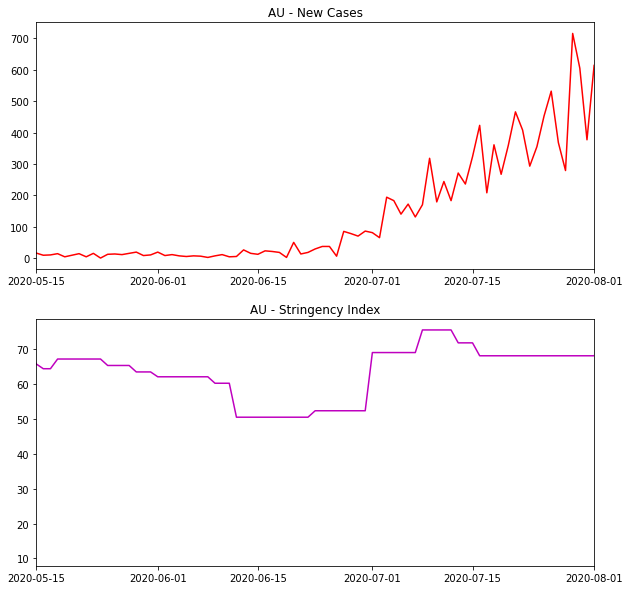

In [ ]:
# Closer look into second covid wave in Austrlia
fig, axes = plt.subplots(2, 1,figsize=(10, 10))

axes[0].plot(au_covid_cc_data_pd["date"], au_covid_cc_data_pd["new_cases"], c ='r')
axes[0].set_title("AU - New Cases")
axes[0].set_xlim(pd.Timestamp('2020-05-15'), pd.Timestamp('2020-08-01'))

axes[1].plot(au_covid_cc_data_pd["date"], au_covid_cc_data_pd["stringency_index"], c = 'm')
axes[1].set_title("AU - Stringency Index")
axes[1].set_xlim(pd.Timestamp('2020-05-15'), pd.Timestamp('2020-08-01'))

plt.show()